# Previsão de Reclamações de Consumidores

O aumento no número de queixas registradas por consumidores é um sinal de alerta para qualquer empresa. Cada reclamação representa uma falha na entrega de valor ao cliente, podendo levar à insatisfação, perda de confiança e, consequentemente, cancelamento de serviços/abandono da marca. No contexto de uma grande empresa, um volume elevado de queixas pode ter um impacto significativo na receita, na reputação e no crescimento a longo prazo. Ao invés de lidar com as queixas de forma reativa, a empresa pode, através da análise de dados, antecipar e prevenir a insatisfação dos clientes.

O objetivo deste trabalho é avaliar o perfil de clientes de um mercado e identificar os principais fatores que podem levar clientes a efetuarem reclamações. Para isso será utilizado o conjunto de dados disponível em https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis. O conjunto de dados oferece uma visão ampla dos consumidores, incluindo:

*   **Dados demográficos:** Idade, renda, educação e composição familiar. Esses dados permitem segmentar os clientes e identificar se certos grupos demográficos são mais propensos a reclamar do que outros.
*   **Padrões de consumo:** Informações sobre os hábitos de compra dos consumidores, como valor gasto, frequência de compras e canais utilizados. Esses dados podem revelar se certos produtos, serviços ou canais de compra estão gerando mais reclamações.

A análise desse conjunto de dados é importante por diversos motivos:

1.  **Identificação das causas raiz das reclamações:** Ao invés de tratar os sintomas (as reclamações em si), a empresa pode usar a análise de dados para entender os fatores subjacentes que levam à insatisfação. Por exemplo, será que clientes de uma determinada faixa etária que compram online estão mais insatisfeitos? Existe uma correlação entre renda e o número de reclamações?
2.  **Tomada de decisão baseada em dados:** A análise permite que a empresa tome decisões estratégicas baseadas em fatos concretos, e não em suposições. Isso torna as ações de melhoria mais eficazes e direcionadas.
3.  **Melhoria da experiência do cliente:** Ao entender o que gera insatisfação, a empresa pode implementar mudanças que melhorem a experiência do cliente de forma proativa, reduzindo a probabilidade de futuras reclamações.
4.  **Redução de custos:** Resolver problemas antes que eles se transformem em reclamações é mais barato do que lidar com as consequências da insatisfação do cliente, como perda de clientes, custos de atendimento ao cliente e danos à reputação.
5.  **Aumento da retenção de clientes:** Um cliente satisfeito é mais propenso a permanecer fiel à marca. Ao reduzir o número de reclamações e melhorar a experiência do cliente, a empresa pode aumentar a retenção e o valor do ciclo de vida do cliente (customer lifetime value).
6.  **Vantagem competitiva:** Empresas que utilizam dados para entender e atender melhor seus clientes ganham uma vantagem competitiva significativa no mercado.

**Contribuição para o entendimento do comportamento dos consumidores:**

Esta análise contribui para um entendimento mais profundo do comportamento dos consumidores ao:

*   **Revelar padrões e tendências:** Identificar quais fatores estão fortemente correlacionados com a probabilidade de um cliente registrar uma reclamação.
*   **Permitir a segmentação de clientes:** Agrupar os clientes com base em características e comportamentos semelhantes, permitindo um atendimento mais personalizado e eficaz.
*   **Prever o comportamento futuro:** Construir um modelo preditivo que possa identificar clientes com alto risco de insatisfação, permitindo que a empresa intervenha proativamente.

Em resumo, a análise do conjunto de dados não é apenas uma tarefa técnica, mas sim uma **iniciativa estratégica** que pode ajudar a empresa a melhorar a satisfação do cliente, reduzir custos, aumentar a retenção e fortalecer sua posição no mercado. Ao transformar dados em insights acionáveis, a empresa pode construir relacionamentos mais fortes e duradouros com seus clientes.



## Campos do Conjunto de Dados

**Cliente**

*   **ID:** Identificador único do cliente.
*   **Year_Birth:** Ano de nascimento do cliente.
*   **Education:** Nível de escolaridade do cliente.
*   **Marital_Status:** Estado civil do cliente.
*   **Income:** Renda familiar anual do cliente.
*   **Kidhome:** Número de crianças no domicílio do cliente.
*   **Teenhome:** Número de adolescentes no domicílio do cliente.
*   **Dt_Customer:** Data de cadastro do cliente na empresa.
*   **Recency:** Número de dias desde a última compra do cliente.
*   **Complain:** 1 se o cliente fez uma reclamação nos últimos 2 anos, 0 caso contrário.

**Produto**

*   **MntWines:** Valor gasto em vinhos nos últimos 2 anos.
*   **MntFruits:** Valor gasto em frutas nos últimos 2 anos.
*   **MntMeatProducts:** Valor gasto em carnes nos últimos 2 anos.
*   **MntFishProducts:** Valor gasto em peixes nos últimos 2 anos.
*   **MntSweetProducts:** Valor gasto em doces nos últimos 2 anos.
*   **MntGoldProds:** Valor gasto em ouro nos últimos 2 anos.

**Local / Canal de Compra**

*   **NumWebPurchases:** Número de compras feitas através do site da empresa.
*   **NumCatalogPurchases:** Número de compras feitas usando um catálogo.
*   **NumStorePurchases:** Número de compras feitas diretamente nas lojas.
*   **NumWebVisitsMonth:** Número de visitas ao site da empresa no último mês.

**Promoção**

*   **NumDealsPurchases:** Número de compras feitas com desconto.
*   **AcceptedCmp1:** 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário.
*   **AcceptedCmp2:** 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário.
*   **AcceptedCmp3:** 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário.
*   **AcceptedCmp4:** 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário.
*   **AcceptedCmp5:** 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário.
*   **Response:** 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário.

In [131]:
# python imports

import os
import sys
import warnings

from datetime import date
from pathlib import Path

warnings.filterwarnings('ignore')
PROJECT_PATH = os.path.abspath('..')
sys.path.append(PROJECT_PATH)

# third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns



from IPython.display import display, Markdown
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


# configurações
pd.options.display.max_columns = 500
default_figsize = (16, 5)
default_figsize_small = (16, 2.5)

dataset_path = Path(PROJECT_PATH) / 'data' / 'marketing_campaign.csv'

In [132]:
df = pd.read_csv(dataset_path, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Análise Exploratória

### Informações gerais

In [133]:
md = f'''\
__Quantidade de Variáveis__: {df.shape[1]} \\
__Quantidade de Observações__: {df.shape[0]}

__RowNumber__: Um número sequencial atribuído a cada linha. \\
__CustomerId__: Um identificador único para cada cliente. 

A coluna ID não é relevante para a análise, portanto, será removida.
'''

display(Markdown(md))

df.drop(columns=['ID'], inplace=True, errors='ignore')

__Quantidade de Variáveis__: 29 \
__Quantidade de Observações__: 2240

__RowNumber__: Um número sequencial atribuído a cada linha. \
__CustomerId__: Um identificador único para cada cliente. 

A coluna ID não é relevante para a análise, portanto, será removida.


### Valores Nulos


In [134]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

A única coluna que apresenta valores nulos é Income. Este problema será avaliado na análise exploratória dessa variável.

### Complain

Variável Alvo. Indica se o cliente realizou reclamações nos últimos 2 anos. (1 para sim, 0 para não).

In [135]:
df['Complain'].value_counts(normalize=False)

Complain
0    2219
1      21
Name: count, dtype: int64

O dataset possui um desbalanceamento muito acentuado para a variável alvo.

### Year_Birth

Ano de nascimento do cliente.

In [136]:
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [137]:
df_vc = df['Year_Birth'].value_counts()
df_vc.head()

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
Name: count, dtype: int64

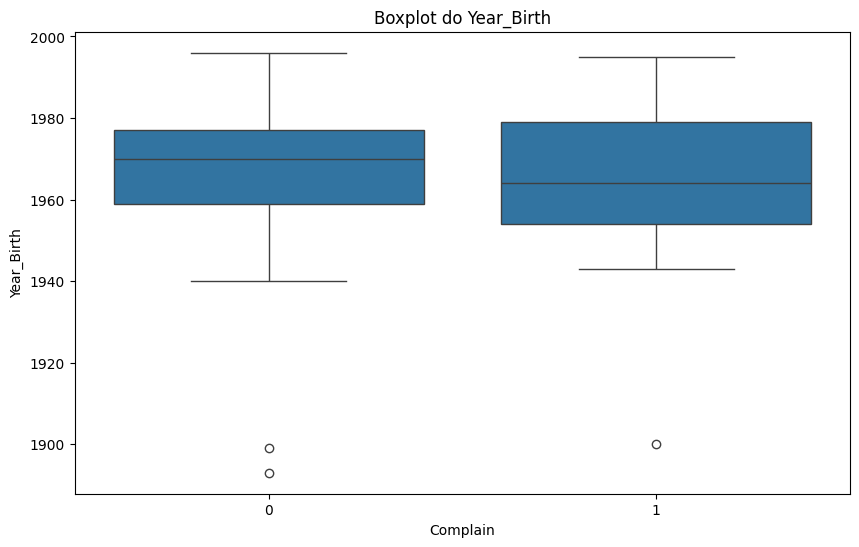

In [138]:
# Year_Birth x Complain

plt.figure(figsize=(10,6))
sns.boxplot(y='Year_Birth', x='Complain', data=df)
plt.title('Boxplot do Year_Birth')
plt.show()

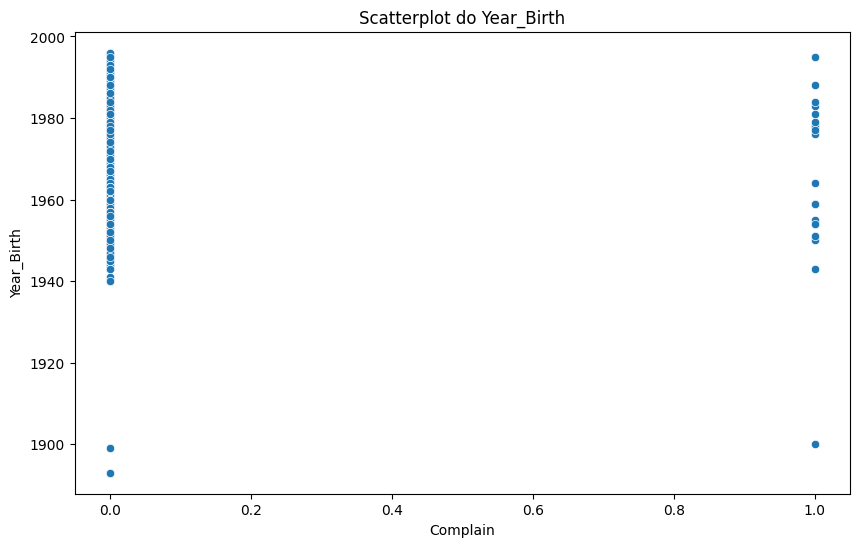

In [139]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='Year_Birth', x='Complain', data=df)
plt.title('Scatterplot do Year_Birth')
plt.show()

### Education

Nível de escolaridade do cliente. Variável categórica que pode ter os valores, do menos instruído para o mais instruído:

* **Basic (Ensino Fundamental/Básico)**: Representa o nível mais baixo de educação formal, geralmente correspondendo aos primeiros anos de escolaridade obrigatória.
* **2nd Cycle (Ensino Médio/Secundário)**: Representa a conclusão da educação secundária, que normalmente segue a educação básica.
* **Graduation (Graduação/Ensino Superior - Bacharelado/Licenciatura)**: Representa a conclusão do primeiro ciclo do ensino superior, conferindo um diploma de bacharel ou licenciado.
* **Master (Mestrado)**: É um grau acadêmico de pós-graduação, indicando um nível de especialização em uma determinada área após a conclusão da graduação.
* **PhD (Doutorado/Doutoramento)**: É o grau acadêmico mais elevado, representando o auge da formação acadêmica e a capacidade de realizar pesquisas originais e independentes.

In [140]:
df['Education'].describe()

count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object

In [141]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [142]:
df[['Education','Complain']].groupby(['Education','Complain']).size().reset_index(name='Total')

,Education,Complain,Total
0,2n Cycle,0,199
1,2n Cycle,1,4
2,Basic,0,54
3,Graduation,0,1113
4,Graduation,1,14
5,Master,0,368
6,Master,1,2
7,PhD,0,485
8,PhD,1,1


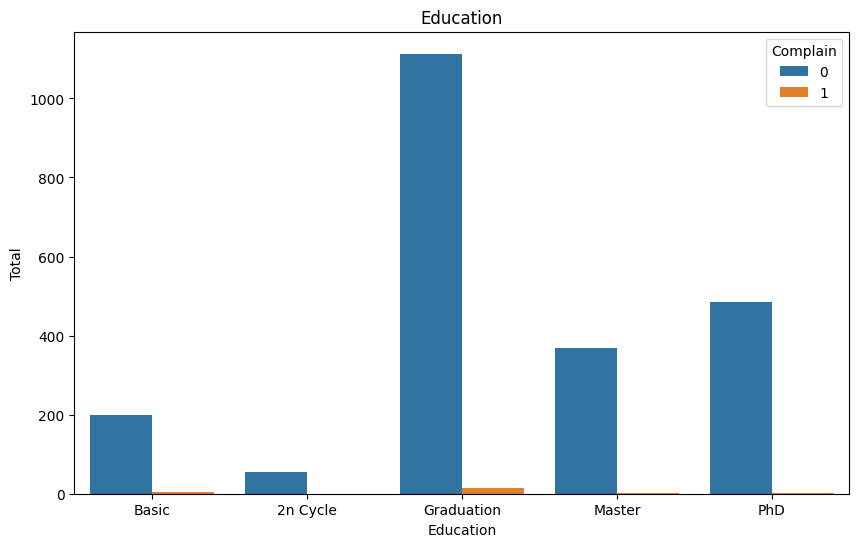

In [143]:
plt.figure(figsize=(10,6))
df_vc = df[['Education','Complain']].groupby(['Education','Complain']).size().reset_index(name='Total')
sns.barplot(x='Education', y='Total', hue='Complain', data=df_vc, orient='v')
plt.title('Education')
plt.xticks(ticks=[0,1,2,3,4], labels=['Basic','2n Cycle','Graduation','Master','PhD'])
plt.show()

### Marital_Status

Estado civil do cliente.

*   **Married (Casado):** Representa indivíduos que estão em um casamento legalmente reconhecido. É uma situação formalizada de união entre duas pessoas, com implicações legais, sociais e, muitas vezes, religiosas.
*   **Together (Juntos):** Esta categoria é mais ampla e sugere um relacionamento sério e comprometido, onde duas pessoas estão em uma parceria, mas sem necessariamente estarem casadas. Pode incluir casais que moram juntos (união estável), noivos, ou aqueles que simplesmente se consideram em um relacionamento estável e de longo prazo. A principal diferença para "Casado" é a ausência do vínculo legal.
*   **Single (Solteiro):** Refere-se a indivíduos que não estão em um relacionamento sério ou comprometido no momento. Eles não são casados, não estão "juntos" no sentido descrito acima, e podem ou não estar ativamente buscando um parceiro. Este estado é frequentemente associado à independência e liberdade pessoal.
*   **Divorced (Divorciado):** Descreve pessoas que foram legalmente casadas, mas cujo casamento foi dissolvido por meio de um processo legal de divórcio. Isso indica o término formal de um casamento anterior.
*   **Widow (Viúvo/Viúva):** Esta categoria se refere a indivíduos cujo cônjuge faleceu.

*   **Alone (Sozinho):** Este termo é um pouco mais subjetivo e pode se sobrepor a outras categorias como "Solteiro" ou "Divorciado". x

*   **Absurd (Absurdo):** Esta é uma categoria não convencional em termos de estado civil. Pode indicar uma resposta sarcástica, uma recusa em se enquadrar nas categorias tradicionais ou simplesmente uma situação de relacionamento que é difícil de definir ou categorizar.

*   **YOLO (You Only Live Once - Você Só Vive Uma Vez):**  Mais do que um estado civil, YOLO é uma filosofia de vida. No contexto de relacionamentos, pode indicar uma atitude despreocupada em relação a compromissos sérios, uma preferência por experiências casuais ou uma abordagem não convencional aos relacionamentos. Também é possível que seja usado de forma humorística.

Existem algumas categorias incomuns que talvez possam ser agrupadas em outras caso seja interessante ou hajam poucos dados.

In [144]:
df['Marital_Status'].describe()

count        2240
unique          8
top       Married
freq          864
Name: Marital_Status, dtype: object

In [145]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [146]:
df[['Marital_Status','Complain']].groupby(['Marital_Status','Complain']).size().reset_index(name='Total')

,Marital_Status,Complain,Total
0,Absurd,0,2
1,Alone,0,3
2,Divorced,0,230
3,Divorced,1,2
4,Married,0,856
5,Married,1,8
6,Single,0,474
7,Single,1,6
8,Together,0,575
9,Together,1,5


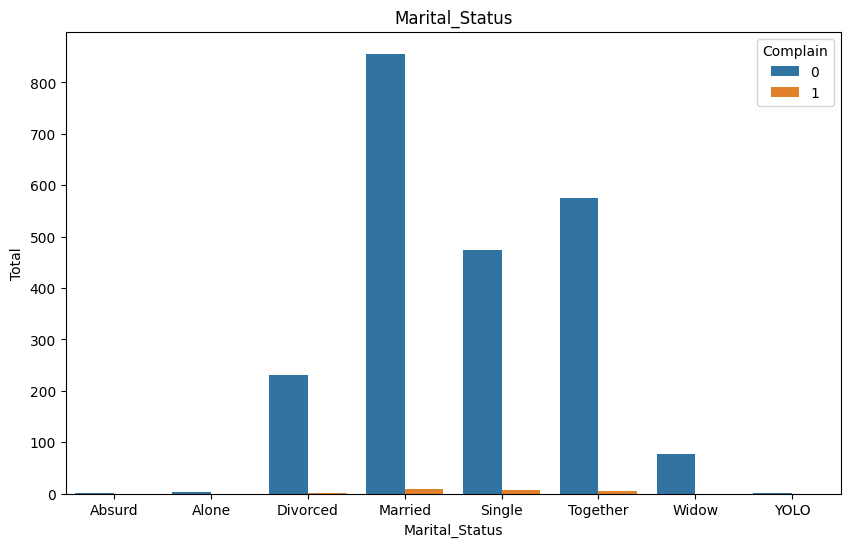

In [147]:
plt.figure(figsize=(10,6))
df_vc = df[['Marital_Status','Complain']].groupby(['Marital_Status','Complain']).size().reset_index(name='Total')
sns.barplot(x='Marital_Status', y='Total', hue='Complain', data=df_vc, orient='v')
plt.title('Marital_Status')
plt.show()

### Income

Renda familiar anual do cliente.

In [148]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [149]:
# listar apenas os nulos
df[df['Income'].isna()]['Complain'].value_counts()

Complain
0    24
Name: count, dtype: int64

Todos os registros que possuem o campo Income nulo não fizeram reclamações.

In [150]:
df['Income'].value_counts()

Income
7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: count, Length: 1974, dtype: int64

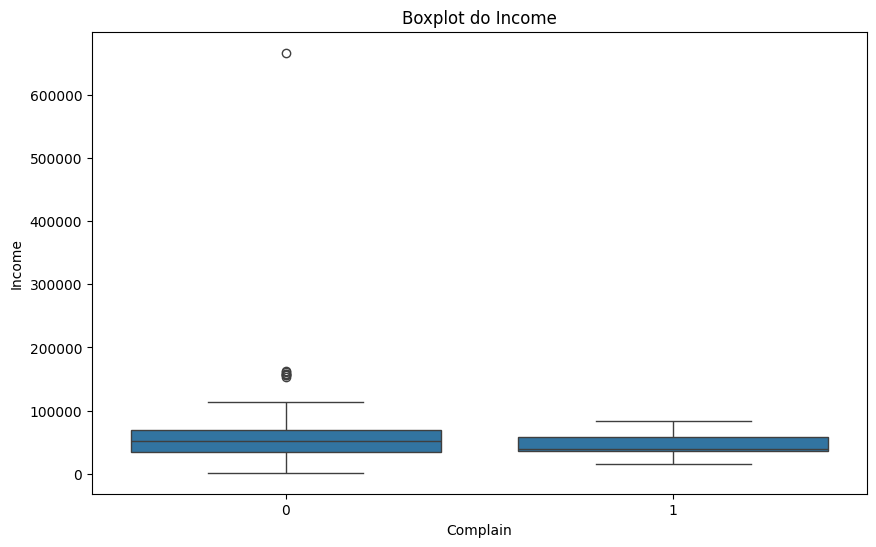

In [151]:

plt.figure(figsize=(10,6))
sns.boxplot(y='Income', x='Complain', data=df)
plt.title('Boxplot do Income')
plt.show()

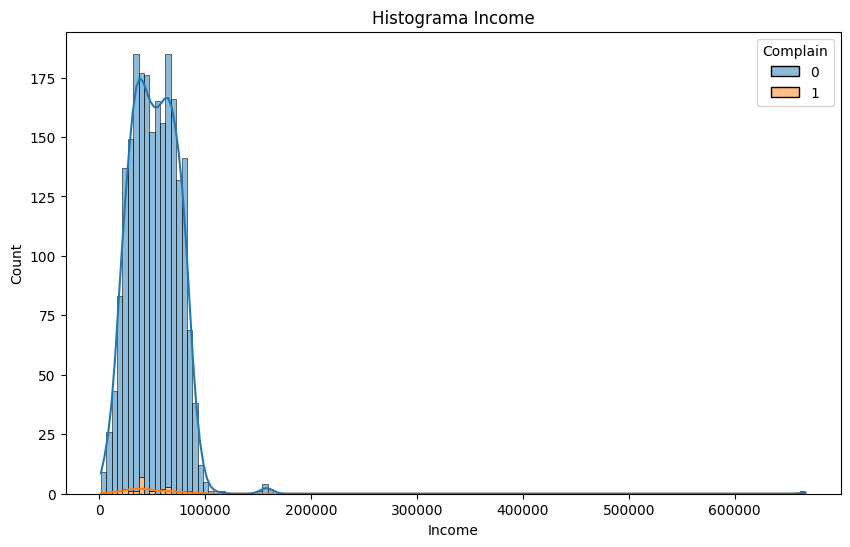

In [152]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Income', hue='Complain', kde=True, multiple='stack')
plt.title('Histograma Income')
plt.show()

Por serem poucos registros nulos e todos pertencentes apenas à categoria dos que não fizeram reclamação, esses registros serão eliminados.

In [153]:
df = df[df['Income'].isna() == False].copy()
df.shape

(2216, 28)

### Kidhome e Teenhome

Número de crianças no domicílio do cliente.

In [154]:
df['Kidhome'].describe()

count    2216.000000
mean        0.441787
std         0.536896
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

In [155]:
df['Kidhome'].value_counts()

Kidhome
0    1283
1     887
2      46
Name: count, dtype: int64

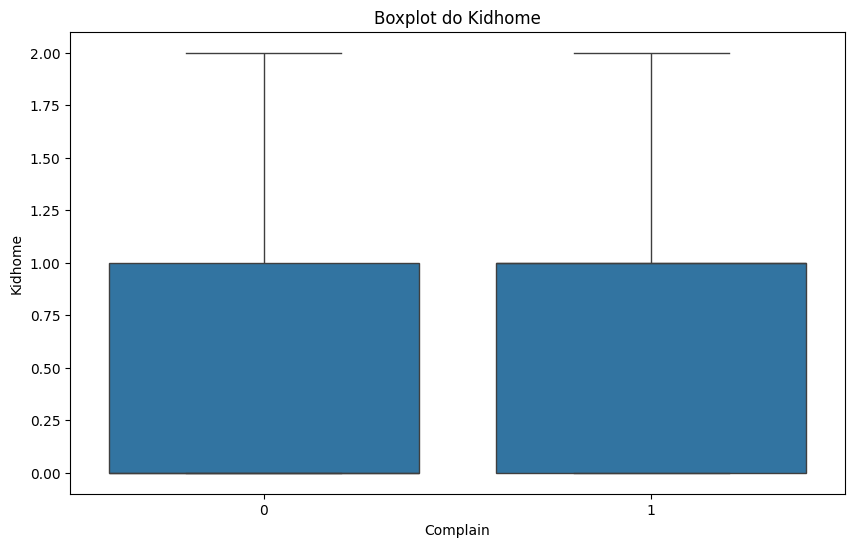

In [156]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Kidhome', x='Complain', data=df)
plt.title('Boxplot do Kidhome')
plt.show()

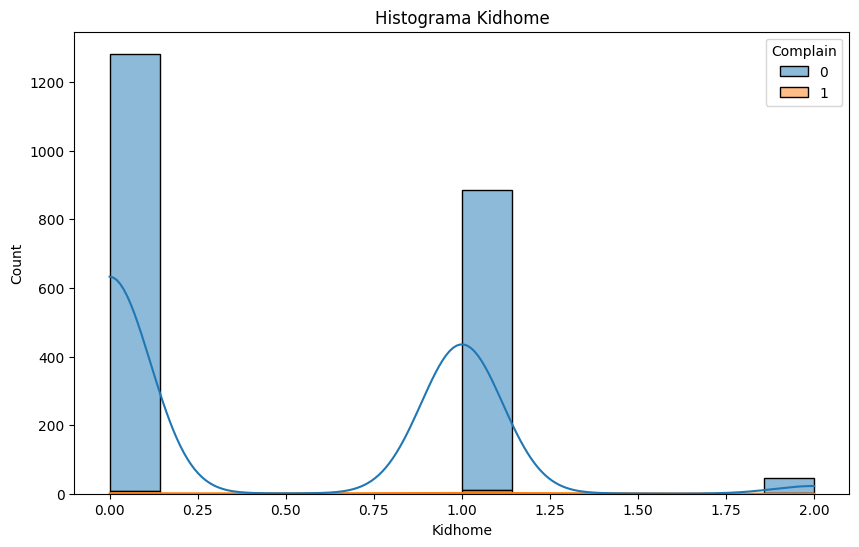

In [157]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Kidhome', hue='Complain', kde=True, multiple='stack')
plt.title('Histograma Kidhome')
plt.show()

In [158]:
df['Teenhome'].describe()

count    2216.000000
mean        0.505415
std         0.544181
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64

In [159]:
df['Teenhome'].value_counts()

Teenhome
0    1147
1    1018
2      51
Name: count, dtype: int64

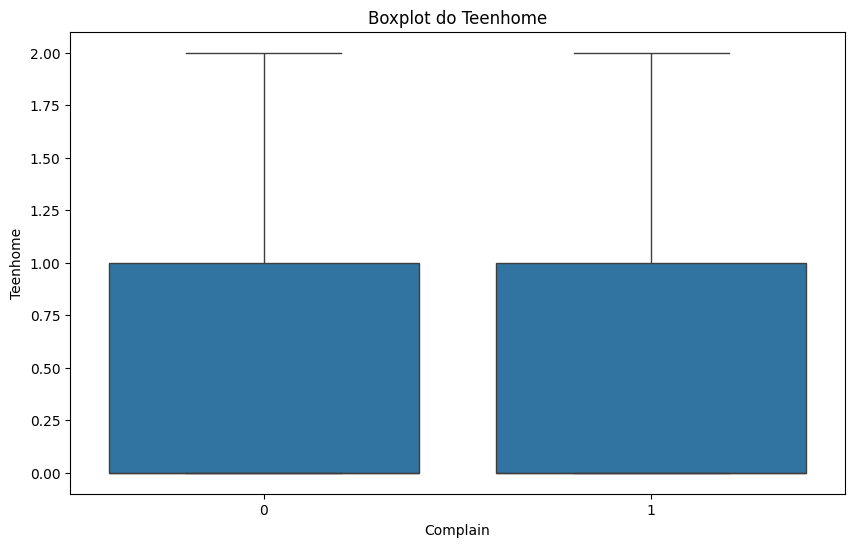

In [160]:
# CreditScore x Exit

plt.figure(figsize=(10,6))
sns.boxplot(y='Teenhome', x='Complain', data=df)
plt.title('Boxplot do Teenhome')
plt.show()

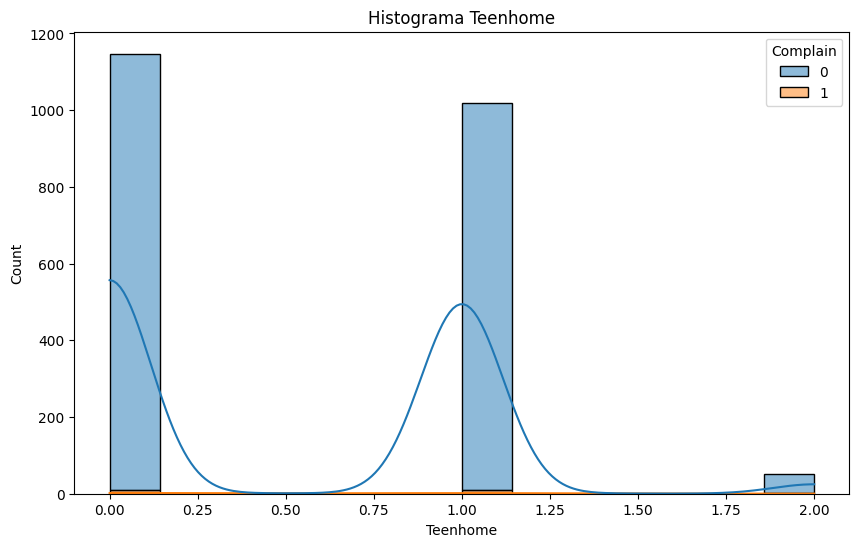

In [161]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Teenhome', hue='Complain', kde=True, multiple='stack')
plt.title('Histograma Teenhome')
plt.show()

### Dt_Customer

Data de cadastro do cliente na empresa. Pode ser transformada em número de dias desde que o cliente se cadastrou.

In [162]:
df['Days_Customer'] = (pd.to_datetime(date.today()) - pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y'))
df['Days_Customer'] = df['Days_Customer'].dt.days

In [163]:
df['Days_Customer'].describe()

count    2216.000000
mean     4207.521209
std       202.434667
min      3854.000000
25%      4034.000000
50%      4209.500000
75%      4383.000000
max      4553.000000
Name: Days_Customer, dtype: float64

In [164]:
df['Complain'].value_counts()

Complain
0    2195
1      21
Name: count, dtype: int64

In [165]:
df['Days_Customer'].value_counts()

Days_Customer
4521    12
4509    11
4354    11
3902    11
4167    10
        ..
4547     1
4442     1
3905     1
4222     1
4025     1
Name: count, Length: 662, dtype: int64

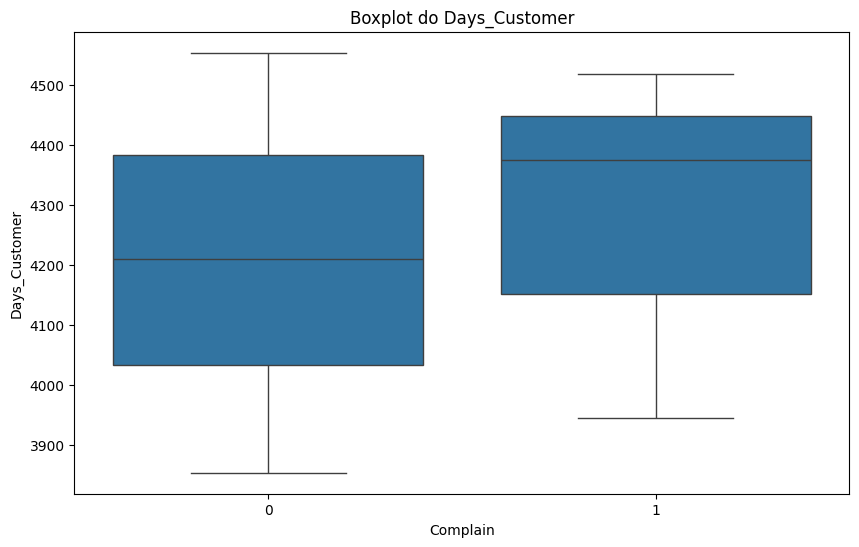

In [166]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Days_Customer', x='Complain', data=df)
plt.title('Boxplot do Days_Customer')
plt.show()

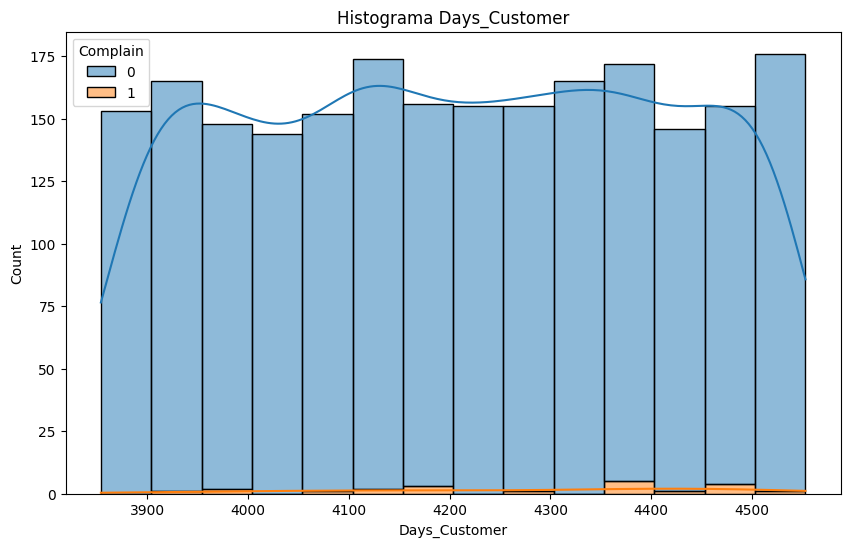

In [167]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Days_Customer', hue='Complain', kde=True, multiple='stack')
plt.title('Histograma Days_Customer')
plt.show()

In [168]:
df.drop(columns=['Dt_Customer'], inplace=True, errors='ignore')

Dt_customer foi substituído por Days_Customer.

### Recency

Número de dias desde a última compra do cliente

In [169]:
df['Recency'].describe()

count    2216.000000
mean       49.012635
std        28.948352
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [170]:
df['Recency'].value_counts()

Recency
56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: count, Length: 100, dtype: int64

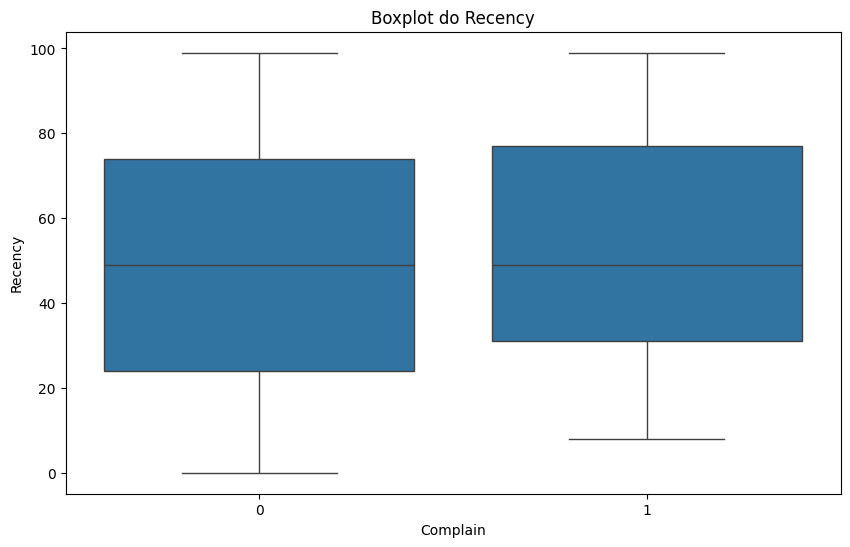

In [171]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Recency', x='Complain', data=df)
plt.title('Boxplot do Recency')
plt.show()

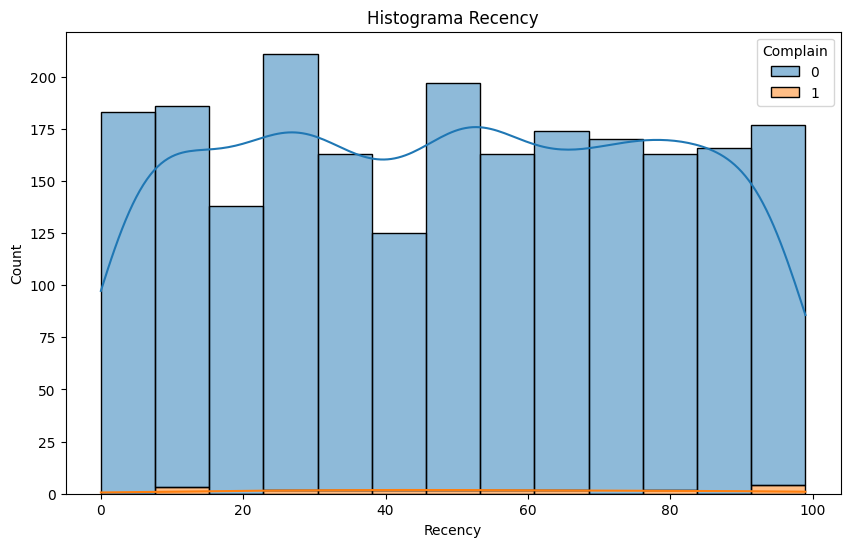

In [172]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Recency', hue='Complain', kde=True, multiple='stack')
plt.title('Histograma Recency')
plt.show()

### Gastos com Produtos

*   **MntWines:** Valor gasto em vinhos nos últimos 2 anos.
*   **MntFruits:** Valor gasto em frutas nos últimos 2 anos.
*   **MntMeatProducts:** Valor gasto em carnes nos últimos 2 anos.
*   **MntFishProducts:** Valor gasto em peixes nos últimos 2 anos.
*   **MntSweetProducts:** Valor gasto em doces nos últimos 2 anos.
*   **MntGoldProds:** Valor gasto em ouro nos últimos 2 anos.

In [175]:
df['MntProds'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,MntProds
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,4517,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3967,27
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,4166,776
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,3993,53
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,4015,422


In [176]:
columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntProds']

df[columns].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,607.075361
std,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,602.900476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,69.000000
50%,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,396.500000
75%,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,1048.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,2525.000000


In [177]:
df[columns].isnull().sum()


MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
MntProds            0
dtype: int64

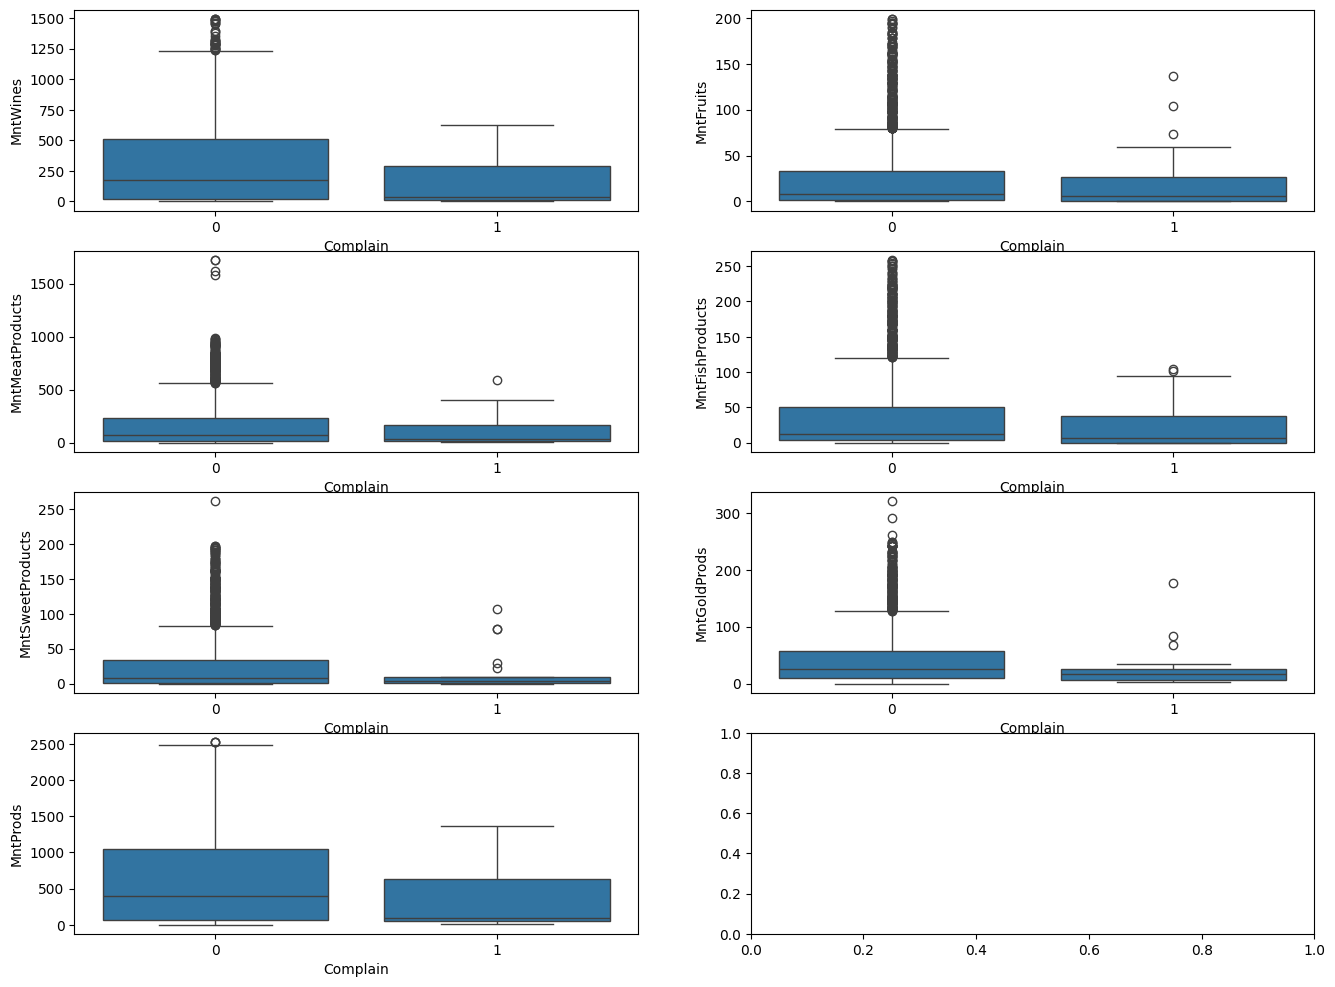

In [179]:
f, axes = plt.subplots(4, 2, figsize=(16, 12))

for i, column in enumerate(columns):
    sns.boxplot(y=column, x='Complain', data=df, ax=axes[i//2, i%2])

plt.show()

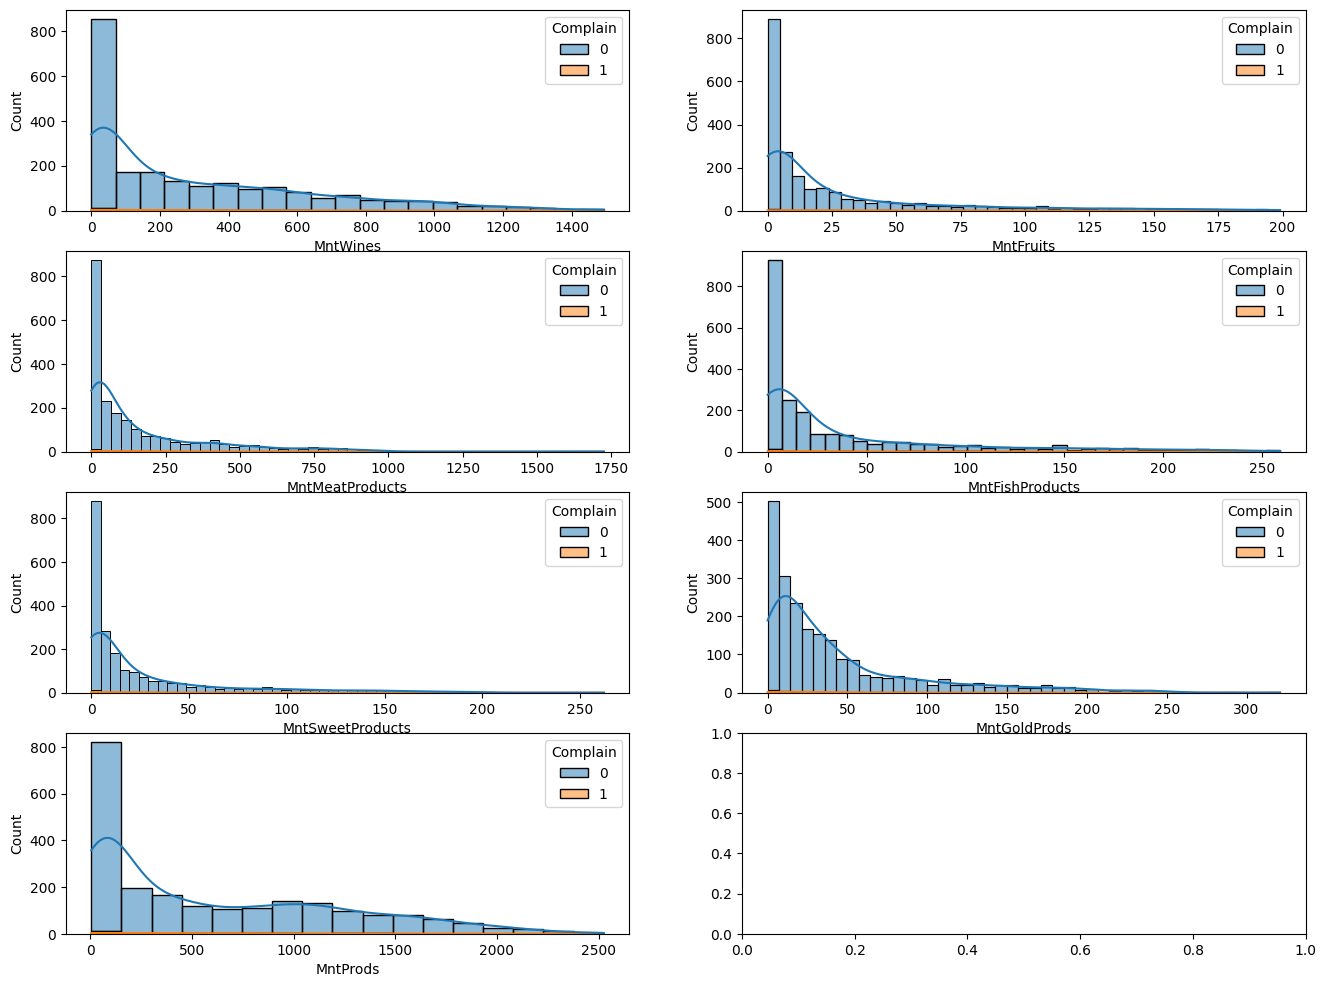

In [180]:
f, axes = plt.subplots(4, 2, figsize=(16, 12))

for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, hue='Complain', kde=True, multiple='stack', ax=axes[i//2, i%2])

plt.show()

### Local / Canal de Compra

*   **NumWebPurchases:** Número de compras feitas através do site da empresa.
*   **NumCatalogPurchases:** Número de compras feitas usando um catálogo.
*   **NumStorePurchases:** Número de compras feitas diretamente nas lojas.
*   **NumWebVisitsMonth:** Número de visitas ao site da empresa no último mês.

In [181]:
df['NumPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,MntProds,NumPurchases
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,4517,1617,25
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3967,27,6
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,4166,776,21
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,3993,53,8
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,4015,422,19


In [182]:
columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumPurchases']
df[columns].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumPurchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.323556,4.085289,2.671029,5.800993,14.880866
std,1.923716,2.740951,2.926734,3.250785,7.670957
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000,8.000000
50%,2.000000,4.000000,2.000000,5.000000,15.000000
75%,3.000000,6.000000,4.000000,8.000000,21.000000
max,15.000000,27.000000,28.000000,13.000000,44.000000


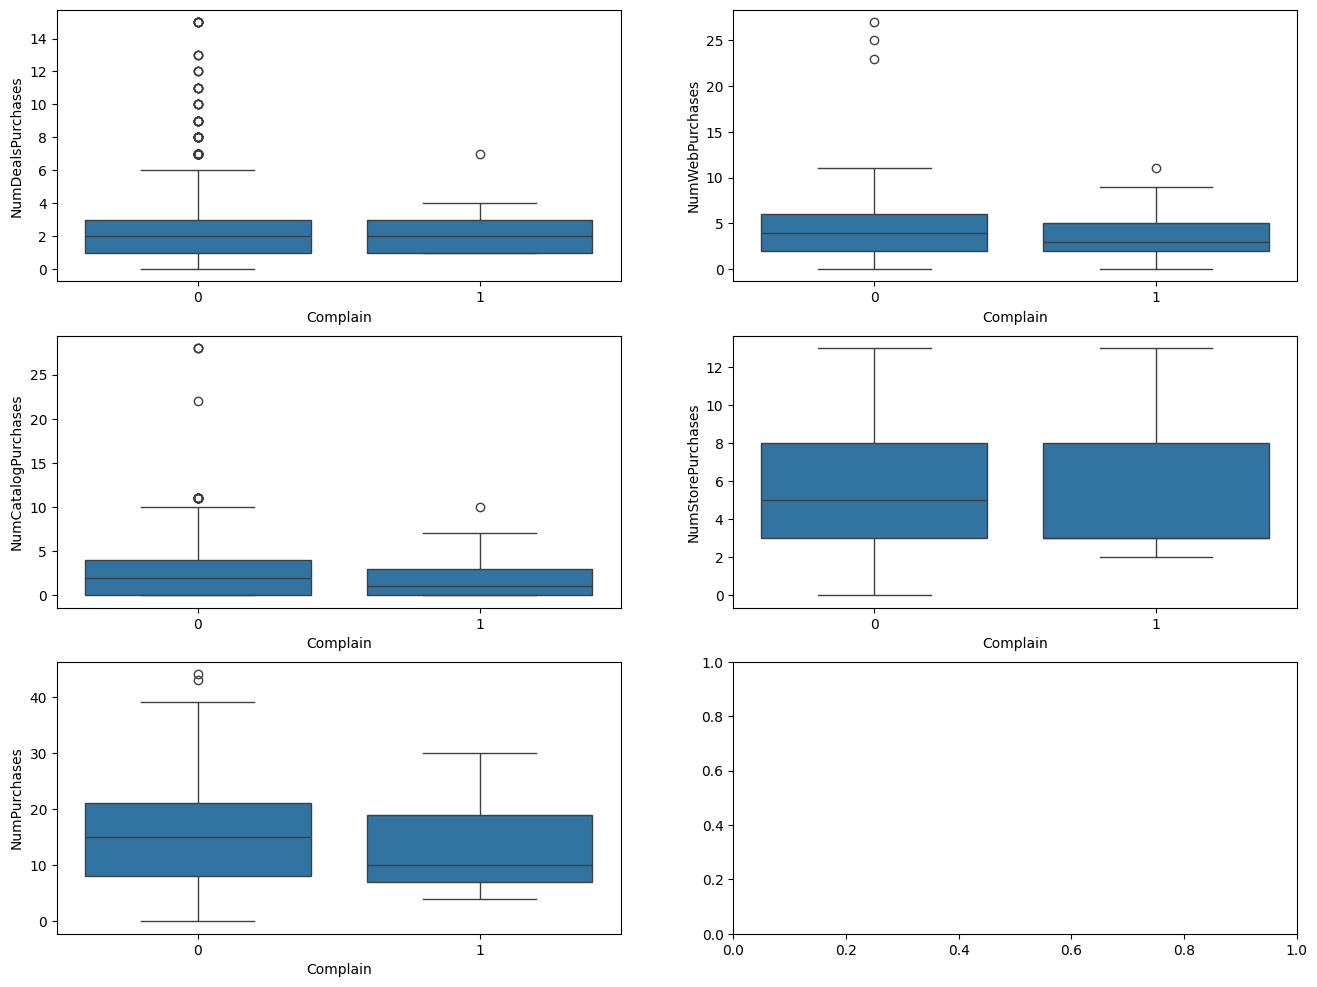

In [184]:
f, axes = plt.subplots(3, 2, figsize=(16, 12))

for i, column in enumerate(columns):
    sns.boxplot(y=column, x='Complain', data=df, ax=axes[i//2, i%2])

plt.show()



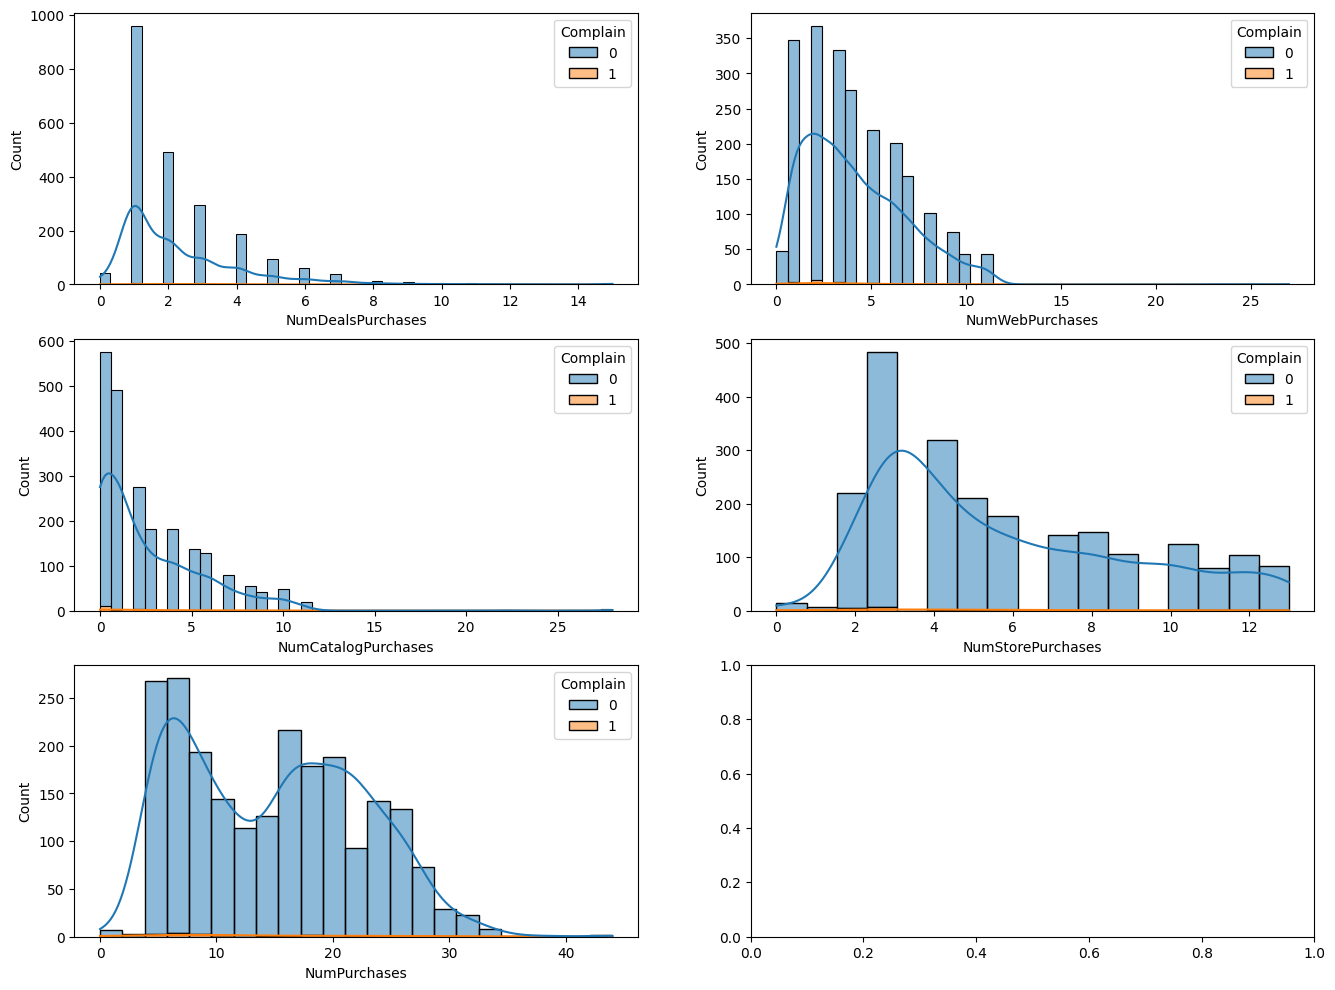

In [185]:
f, axes = plt.subplots(3, 2, figsize=(16, 12))

for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, hue='Complain', kde=True, multiple='stack', ax=axes[i//2, i%2])

plt.show()

### Promoção

*   **NumDealsPurchases:** Número de compras feitas com desconto.
*   **AcceptedCmp1:** 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário.
*   **AcceptedCmp2:** 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário.
*   **AcceptedCmp3:** 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário.
*   **AcceptedCmp4:** 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário.
*   **AcceptedCmp5:** 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário.
*   **Response:** 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário.

In [198]:
columns = ['NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
df[columns]

,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,7,0,0,0,0,0,1,0
1,5,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2235,5,0,0,0,0,0,0,0
2236,7,1,0,0,0,0,0,0
2237,6,0,0,0,1,0,0,0
2238,3,0,0,0,0,0,0,0


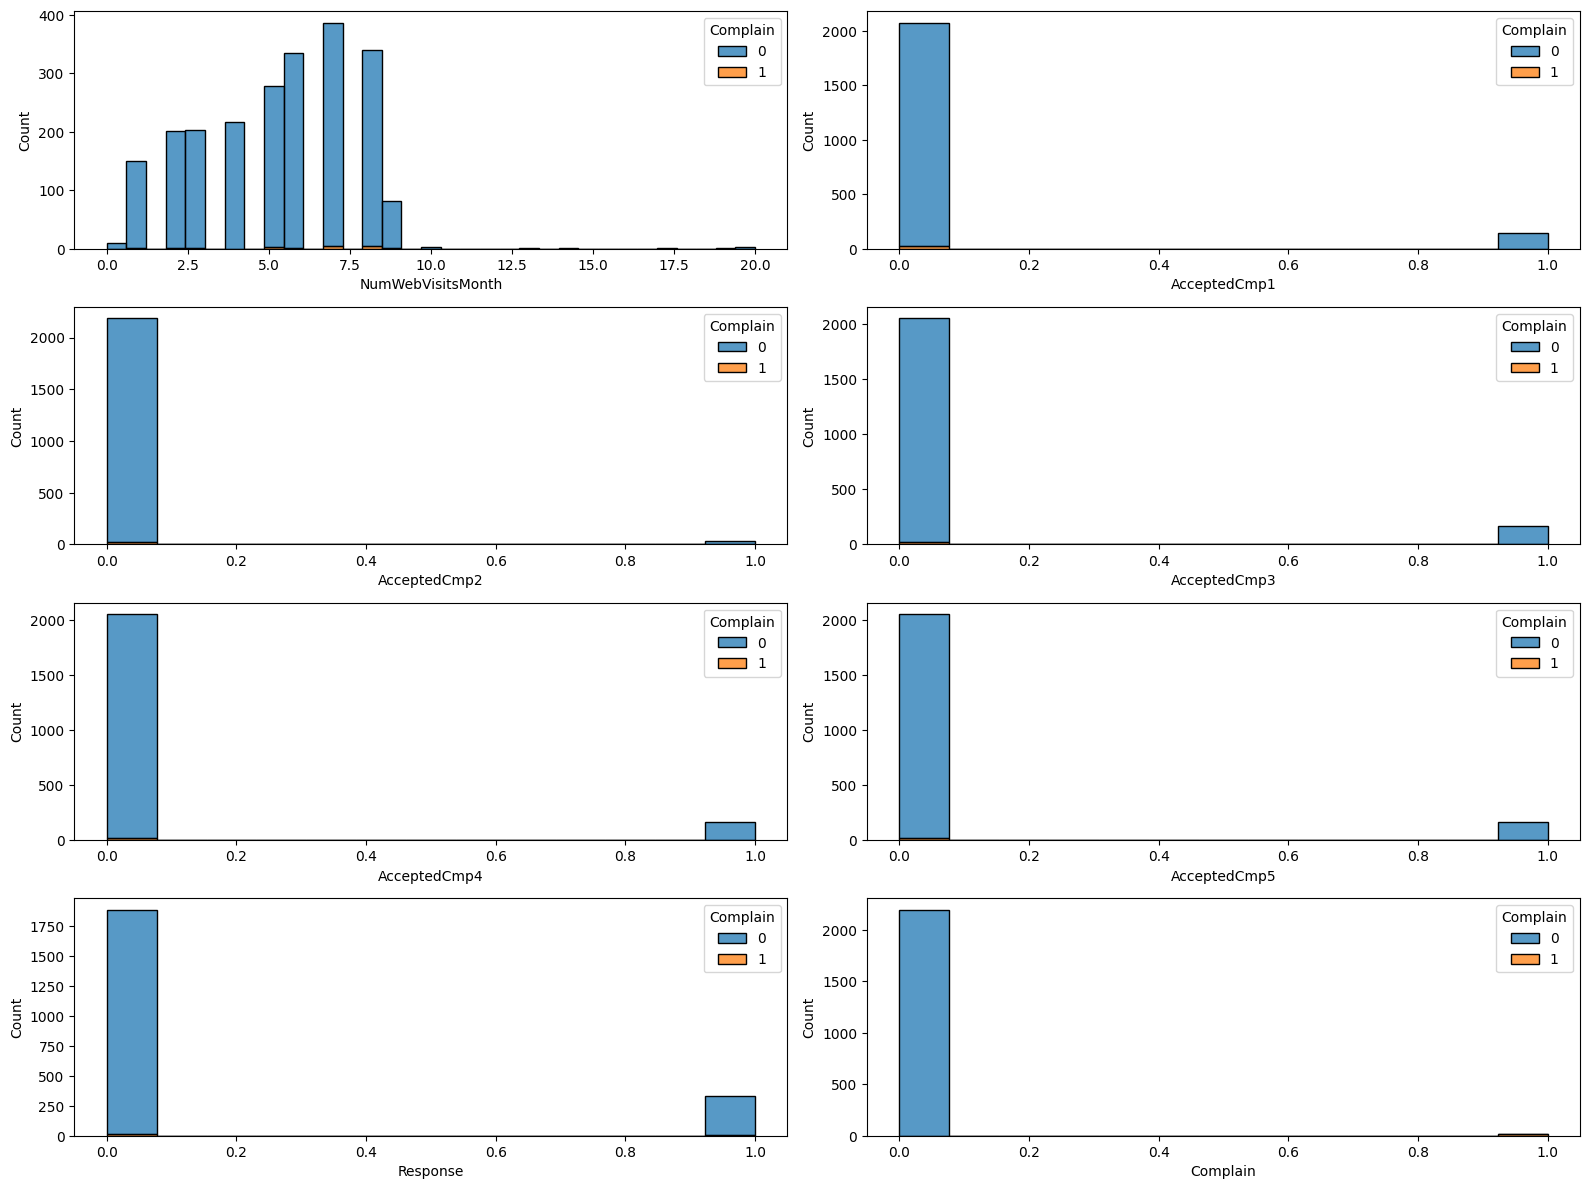

In [200]:
f, axes = plt.subplots(4, 2, figsize=(16, 12))

for i, column in enumerate(columns):
    sns.histplot(x=column, data=df, ax=axes[i//2, i%2], hue='Complain',  multiple='stack')
    
plt.tight_layout()
plt.show()

## Modelagem

In [52]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.444947
         Iterations 6
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: Exited           Pseudo R-squared: 0.120      
Date:               2025-01-10 18:31 AIC:              8918.9377  
No. Observations:   10000            BIC:              8991.0411  
Df Model:           9                Log-Likelihood:   -4449.5    
Df Residuals:       9990             LL-Null:          -5054.9    
Converged:          1.0000           LLR p-value:      5.5266e-255
No. Iterations:     6.0000           Scale:            1.0000     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
CreditScore       -0.0036   0.0002 -19.0085 0.0000 -0.0039 -0.0032
Age                0.0589   0.0023  25.3560 0.0000  0

## Interpretação dos Coeficientes

In [53]:
coef = result.params
pval = result.pvalues
odds_ratio = np.exp(coef)
significance = pval.apply(lambda x: 'Significante' if x < 0.05 else 'Não Significante')

df_coef = pd.DataFrame({
    'Coeficiente': coef, 
    'Odds Ratio': odds_ratio, 
    'P-valor': pval, 
    'Significância': significance,
})
df_coef

,Coeficiente,Odds Ratio,P-valor,Significância
CreditScore,-3.571312e-03,0.996435,1.449177e-80,Significante
Age,5.885275e-02,1.060619,7.720996e-142,Significante
Tenure,-3.914622e-02,0.961610,1.366937e-05,Significante
Balance,3.204947e-06,1.000003,4.912917e-13,Significante
NumOfProducts,-2.698805e-01,0.763471,1.200851e-09,Significante
HasCrCard,-1.829269e-01,0.832829,1.160800e-03,Significante
IsActiveMember,-1.074303e+00,0.341536,5.556568e-82,Significante
EstimatedSalary,-8.388505e-07,0.999999,6.447896e-02,Não Significante
Geography_Germany,-3.062743e-01,0.736185,2.425679e-06,Significante
Gender_Male,-6.320580e-01,0.531497,5.507662e-33,Significante


In [54]:
md = f'''\
'''

for index, row in df_coef.iterrows():
    if index in ['Geography_Germany']:
        continue
    impactos = 'aumentam' if row['Coeficiente'] > 0 else 'diminuem'
    percentual = row['Odds Ratio'] - 1 if row['Coeficiente'] > 0 else 1 - row['Odds Ratio']
    tmp_md = \
        f'* __{index}__: Para cada aumento de 1 unidade, as chances de cancelamento de conta \
        {impactos} em cerca de {percentual:.8%} (multiplicadas por {row['Odds Ratio']:.8f}).'
    md += tmp_md + '\n'
    

md += f'''\
* __Geography_Germany__: Clientes da alemanha e Espanha tem 26.381535% (multiplicadas por 0.736185) menos chances de cancelamento de contas do que os clientes da França. Alemanha e Espanha possuem correlação perfeita, por essa razão, Espanha foi removida. França é a categoria base.
'''

display(Markdown(md))

* __CreditScore__: Para cada aumento de 1 unidade, as chances de cancelamento de conta         diminuem em cerca de 0.35649421% (multiplicadas por 0.99643506).
* __Age__: Para cada aumento de 1 unidade, as chances de cancelamento de conta         aumentam em cerca de 6.06190481% (multiplicadas por 1.06061905).
* __Tenure__: Para cada aumento de 1 unidade, as chances de cancelamento de conta         diminuem em cerca de 3.83899031% (multiplicadas por 0.96161010).
* __Balance__: Para cada aumento de 1 unidade, as chances de cancelamento de conta         aumentam em cerca de 0.00032050% (multiplicadas por 1.00000320).
* __NumOfProducts__: Para cada aumento de 1 unidade, as chances de cancelamento de conta         diminuem em cerca de 23.65292772% (multiplicadas por 0.76347072).
* __HasCrCard__: Para cada aumento de 1 unidade, as chances de cancelamento de conta         diminuem em cerca de 16.71709275% (multiplicadas por 0.83282907).
* __IsActiveMember__: Para cada aumento de 1 unidade, as chances de cancelamento de conta         diminuem em cerca de 65.84642160% (multiplicadas por 0.34153578).
* __EstimatedSalary__: Para cada aumento de 1 unidade, as chances de cancelamento de conta         diminuem em cerca de 0.00008389% (multiplicadas por 0.99999916).
* __Gender_Male__: Para cada aumento de 1 unidade, as chances de cancelamento de conta         diminuem em cerca de 46.85031554% (multiplicadas por 0.53149684).
* __Geography_Germany__: Clientes da alemanha e Espanha tem 26.381535% (multiplicadas por 0.736185) menos chances de cancelamento de contas do que os clientes da França. Alemanha e Espanha possuem correlação perfeita, por essa razão, Espanha foi removida. França é a categoria base.


## Importância das Variáveis

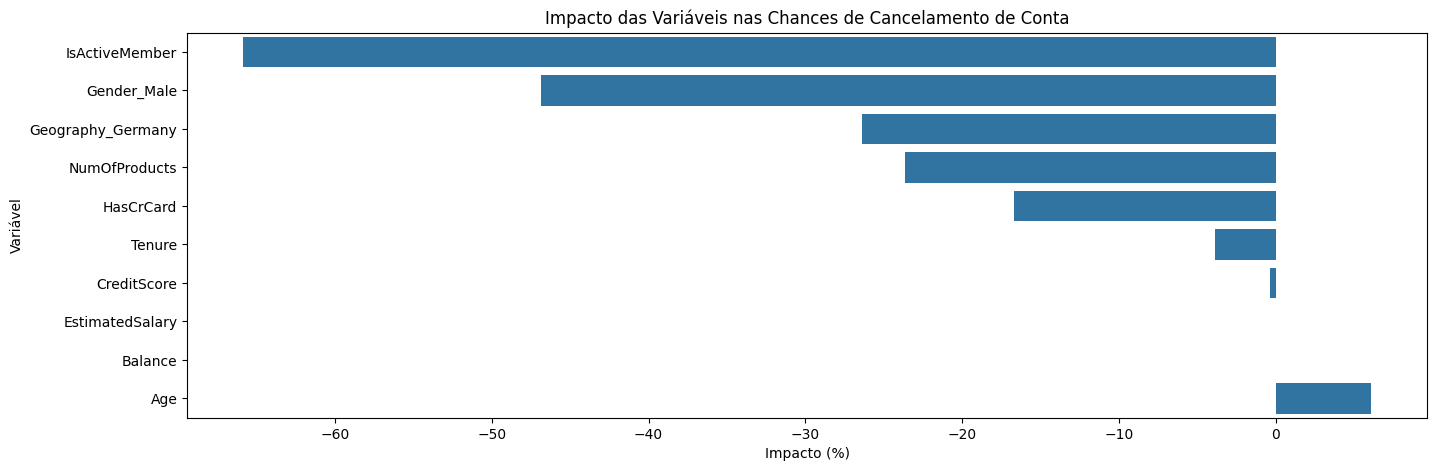

In [55]:
plt.figure(figsize=default_figsize)
sns.barplot(x=df_coef['Odds Ratio'].apply(lambda x: (x - 1) * 100).sort_values(), 
            y=df_coef['Odds Ratio'].apply(lambda x: (x - 1) * 100).sort_values().index, 
            orient='h')
plt.xlabel('Impacto (%)')
plt.ylabel('Variável')
plt.title('Impacto das Variáveis nas Chances de Cancelamento de Conta')
plt.show()

## Avaliação do Modelo

In [56]:
# Treinar o modelo com scikit-learn
model = LogisticRegression(random_state=42, max_iter=1000)

model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo com classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      2379
           1       0.39      0.59      0.47       621

    accuracy                           0.73      3000
   macro avg       0.64      0.68      0.64      3000
weighted avg       0.78      0.73      0.74      3000



In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)
df_conf_mtx = pd.DataFrame(conf_matrix, columns=['Previsto 0', 'Previsto 1'], index=['Real 0', 'Real 1'])
df_conf_mtx.loc['Total Previsto'] = df_conf_mtx.sum(axis=0)
df_conf_mtx['Total Real'] = df_conf_mtx.sum(axis=1)
df_conf_mtx

,Previsto 0,Previsto 1,Total Real
Real 0,1812,567,2379
Real 1,253,368,621
Total Previsto,2065,935,3000


In [58]:
print(f'Acurácia Balanceada: {balanced_accuracy_score(y_test, y_pred):.2f}')
print(f'ROCAUC: {roc_auc_score(y_test, y_pred):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')

Acurácia Balanceada: 0.68
ROCAUC: 0.68
F1 Score: 0.47


In [ ]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, label='Regressão Logística (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('CURVA ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

__Precision (Precisão):__

* Classe 0 (não encerramento de conta): 0.88 - Dos clientes previstos como "não encerramento de conta", 88% realmente não fizeram encerramento de conta.
* Classe 1 (encerramento de conta): 0.39 - Dos clientes previstos como "encerramento de conta", apenas 39% realmente fizeram encerramento de conta.

O modelo é bom em prever corretamente os clientes que não farão encerramento de conta, mas tem baixa precisão para prever os que farão encerramento de conta (muitos falsos positivos para encerramento de conta).


__Recall (Revocação ou Sensibilidade):__

* Classe 0 (não encerramento de conta): 0.76 - Dos clientes que realmente não fizeram encerramento de conta, o modelo previu corretamente 76%.
* Classe 1 (encerramento de conta): 0.59 - Dos clientes que realmente fizeram encerramento de conta, o modelo previu corretamente apenas 59%.

O modelo identifica uma boa parte dos clientes que realmente não farão encerramento de conta, mas tem uma taxa de detecção razoável para os clientes que realmente farão encerramento de conta (muitos falsos negativos para encerramento de conta).


__F1-Score:__

* Classe 0 (não encerramento de conta): 0.82 - Uma média harmônica entre precisão e recall para a classe 0.
* Classe 1 (encerramento de conta): 0.47 - Uma média harmônica entre precisão e recall para a classe 1.

O F1-Score é bom para a classe 0, mas baixo para a classe 1, refletindo o desequilíbrio entre precisão e recall para essa classe.
Accuracy (Acurácia): 0.73 - A proporção geral de previsões corretas (para ambas as classes). 73% das previsões do modelo estão corretas.


__Análise Geral:__

Baixa Precisão para encerramento de conta: A baixa precisão para a classe 1 (0.39) indica que o modelo gera muitos falsos positivos para encerramento de conta. Isso significa que o modelo frequentemente prevê que um cliente fará encerramento de conta quando, na verdade, ele não fará.

Recall Razoável para encerramento de conta: O recall razoável para a classe 1 (0.59) indica que o modelo identifica uma parte considerável dos clientes que realmente farão encerramento de conta, mas ainda perde uma quantidade significativa (falsos negativos).

Implicações para o Negócio: Dependendo do custo dos falsos positivos e falsos negativos, esse modelo pode não ser ideal. Se o custo de perder um cliente que fará encerramento de conta (falso negativo) for alto, o modelo precisará ser melhorado para aumentar o recall da classe 1. Se o custo de oferecer incentivos desnecessários a clientes que não fariam encerramento de conta (falso positivo) for alto, a precisão da classe 1 precisará ser melhorada.